<img src = "https://i.imgur.com/UjutVJd.jpg"  align = "center">
<h1><font size = 5>CONVOLUTIONAL NEURAL NETWORK</font></h1>

**Note: This lab will take too long if you using cpu runtime**
## Introduction

In this section, we will use the famous [MNIST Dataset](http://yann.lecun.com/exdb/mnist/) to build a Convolutional Neural Networks capable to perform handwritten digits classification. CNN will say, with some associated error, what type of digit is the presented input.

---

## Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size = 3><strong>Clik on the links to see the sections:</strong></font>
<br />
- <a href="#ref6">Deep Learning applied on MNIST</a><br />
- <a href="#ref7">Summary of the Deep Convolutional Neural Network</a><br />
- <a href="#ref8">Define functions and train the model</a><br />
- <a href="#ref9">Evaluate the model</a>

---

# Classify MNIST using CNN

We are going to create a simple CNN to performe classification tasks on the MNIST digits dataset. If you are not familiar with the MNIST dataset, please consider to read more about it: <a href="http://yann.lecun.com/exdb/mnist/">click here</a> 

### What is MNIST?

According to Lecun's website, the MNIST is a: "database of handwritten digits that has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image".

### Import the MNIST dataset using TensorFlow built-in feature

It's very important to notice that MNIST is a high optimized data-set and it does not contain images. You will need to build your own code if you want to see the real digits. Another important side note is the effort that the authors invested on this data-set with normalization and centering operations.  

In [0]:
import time
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

W0623 15:39:56.405874 139649900111744 deprecation.py:323] From <ipython-input-1-39bae0eb5971>:4: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0623 15:39:56.407541 139649900111744 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0623 15:39:56.408778 139649900111744 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for 

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0623 15:40:02.127492 139649900111744 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0623 15:40:02.135144 139649900111744 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz


W0623 15:40:02.537134 139649900111744 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: __init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


The <span style="background-color:#dcdcdc
"> One-hot = True</span> argument only means that, in contrast to Binary representation, the labels will be presented in a way that only one bit will be on for a specific digit. 

### Understanding the imported data

The imported data can be divided as follow:

- Training (mnist.train) >>  Use the given dataset with inputs and related outputs for training of NN. In our case, if you give an image that you know that represents a "nine", this set will tell the neural network that we expect a "nine" as the output.  
        - 55,000 data points
        - mnist.train.images for inputs
        - mnist.train.labels for outputs
  
   
- Validation (mnist.validation) >> The same as training, but now the date is used to generate model properties (classification error, for example) and from this, tune parameters like the optimal number of hidden units or determine a stopping point for the back-propagation algorithm  
        - 5,000 data points
        - mnist.validation.images for inputs
        - mnist.validation.labels for outputs
  
  
- Test (mnist.test) >> the model does not have access to this informations prior to the test phase. It is used to evaluate the performance and accuracy of the model against "real life situations". No further optimization beyond this point.  
        - 10,000 data points
        - mnist.test.images for inputs
        - mnist.test.labels for outputs
  

### Creating an interactive section

You have two basic options when using TensorFlow to run your code:

- [Build graphs and run session] Do all the set-up and THEN execute a session to evaluate tensors and run operations (ops) 
- [Interactive session] create your coding and run on the fly. 

For this first part, we will use the interactive session that is more suitable for environments like Jupyter notebooks.

In [0]:
sess = tf.InteractiveSession()

### Creating placeholders

It's a best practice to create placeholders before variable assignments when using TensorFlow. Here we'll create placeholders for inputs ("Xs") and outputs ("Ys").   

__Placeholder 'X':__ represents the "space" allocated input or the images. 
       * Each input has 784 pixels distributed by a 28 width x 28 height matrix   
       * The 'shape' argument defines the tensor size by its dimensions.  
       * 1st dimension = None. Indicates that the batch size, can be of any size.  
       * 2nd dimension = 784. Indicates the number of pixels on a single flattened MNIST image.  
      
__Placeholder 'Y':___ represents the final output or the labels.  
       * 10 possible classes (0,1,2,3,4,5,6,7,8,9)  
       * The 'shape' argument defines the tensor size by its dimensions.  
       * 1st dimension = None. Indicates that the batch size, can be of any size.   
       * 2nd dimension = 10. Indicates the number of targets/outcomes 

__dtype for both placeholders:__ if you not sure, use tf.float32. The limitation here is that the later presented softmax function only accepts float32 or float64 dtypes. For more dtypes, check TensorFlow's documentation <a href="https://www.tensorflow.org/versions/r0.9/api_docs/python/framework.html#tensor-types">here</a>


In [0]:
x  = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

### Convolutional neural networks (CNNs)

Convolutional neural networks (CNNs) is a type of feed-forward neural network, consist of multiple layers of  neurons that have learnable weights and biases. Each neuron in a layer that receives some input, process it, and optionally follows it with a non-linearity. The network has multiple layers such as convolution, max pool, drop out and fully connected layers. In each layer, small neurons process portions of the input image. The outputs of these collections are then tiled so that their input regions overlap, to obtain a higher-resolution representation of the original image; and it is repeated for every such layer. The important point here is: CNNs are able to break the complex patterns down into a series of simpler patterns, through multiple layers.

### CNN architecture
In the first part, we learned how to use a simple ANN to classify MNIST. Now we are going to expand our knowledge using a Deep Neural Network. 


Architecture of our network is:
    
- (Input) -> [batch_size, 28, 28, 1]  >> Apply 32 filter of [5x5]
- (Convolutional layer 1)  -> [batch_size, 28, 28, 32]
- (ReLU 1)  -> [?, 28, 28, 32]
- (Max pooling 1) -> [?, 14, 14, 32]
- (Convolutional layer 2)  -> [?, 14, 14, 64] 
- (ReLU 2)  -> [?, 14, 14, 64] 
- (Max pooling 2)  -> [?, 7, 7, 64] 
- [fully connected layer 3] -> [1x1024]
- [ReLU 3]  -> [1x1024]
- [Drop out]  -> [1x1024]
- [fully connected layer 4] -> [1x10]


The next cells will explore this new architecture.

### Initial parameters

Create general parameters for the model

In [0]:
width = 28 # width of the image in pixels 
height = 28 # height of the image in pixels
flat = width * height # number of pixels in one image 
class_output = 10 # number of possible classifications for the problem

### Input and output

Create place holders for inputs and outputs

In [0]:
x  = tf.placeholder(tf.float32, shape=[None, flat])
y_ = tf.placeholder(tf.float32, shape=[None, class_output])

#### Converting images of the data set to tensors

The input image is a 28 pixels by 28 pixels, 1 channel (grayscale). In this case, the first dimension is the __batch number__ of the image, and can be of any size (so we set it to -1). The second and third dimensions are width and hight, and the last one is the image channels.

In [0]:
x_image = tf.reshape(x, [-1,28,28,1])  
x_image

<tf.Tensor 'Reshape:0' shape=(?, 28, 28, 1) dtype=float32>

### Convolutional Layer 1

#### Defining kernel weight and bias
We define a kernle here. The Size of the filter/kernel is 5x5;  Input channels is 1 (greyscale);  and we need 32 different feature maps (here, 32 feature maps means 32 different filters are applied on each image. So, the output of convolution layer would be 28x28x32). In this step, we create a filter / kernel tensor of shape `[filter_height, filter_width, in_channels, out_channels]`

In [0]:
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32])) # need 32 biases for 32 outputs

<img src="https://ibm.box.com/shared/static/vn26neef1nnv2oxn5cb3uueowcawhkgb.png" style="width:800px;height:400px;" alt="HTML5 Icon" >

#### Convolve with weight tensor and add biases.

To creat convolutional layer, we use __tf.nn.conv2d__. It computes a 2-D convolution given 4-D input and filter tensors.

Inputs:
- tensor of shape [batch, in_height, in_width, in_channels]. x of shape [batch_size,28 ,28, 1]
- a filter / kernel tensor of shape [filter_height, filter_width, in_channels, out_channels]. W is of size [5, 5, 1, 32]
- stride which is  [1, 1, 1, 1]. The convolutional layer, slides the "kernel window" across the input tensor. As the input tensor has 4 dimensions:  [batch, height, width, channels], then the convolution operates on a 2D window on the height and width dimensions. __strides__ determines how much the window shifts by in each of the dimensions. As the first and last dimensions are related to batch and channels, we set the stride to 1. But for second and third dimension, we coould set other values, e.g. [1, 2, 2, 1]
    
    
Process:
- Change the filter to a 2-D matrix with shape [5\*5\*1,32]
- Extracts image patches from the input tensor to form a *virtual* tensor of shape `[batch, 28, 28, 5*5*1]`.
- For each batch, right-multiplies the filter matrix and the image vector.

Output:
- A `Tensor` (a 2-D convolution) of size (?, 28, 28, 32)   
- Notice: the output of the first convolution layer is 32 [28x28] images. Here 32 is considered as volume/depth of the output image.

In [0]:
convolve1= tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1

<img src="https://ibm.box.com/shared/static/iizf4ui4b2hh9wn86pplqxu27ykpqci9.png" style="width:800px;height:400px;" alt="HTML5 Icon" >


#### Apply the ReLU activation Function

In this step, we just go through all outputs convolution layer, __covolve1__, and wherever a negative number occurs,we swap it out for a 0. It is called ReLU activation Function.

In [0]:
h_conv1 = tf.nn.relu(convolve1)

#### Apply the max pooling

__max pooling__ is a form of non-linear down-sampling. It partitions the input image into a set of rectangles and, and then find the maximum value for that region. 

Lets use __tf.nn.max_pool__ function to perform max pooling. 
__Kernel size:__ 2x2 (if the window is a 2x2 matrix, it would result in one output pixel)  
__Strides:__ dictates the sliding behaviour of the kernel. In this case it will move 2 pixels everytime, thus not overlapping. The input is a matix of size 14x14x32, and the output would be a matrix of size 14x14x32.

<img src="https://ibm.box.com/shared/static/kmaja90mn3aud9mro9cn8pbbg1h5pejy.png" alt="HTML5 Icon" style="width:800px;height:400px;"> 



In [0]:
conv1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') #max_pool_2x2
conv1

<tf.Tensor 'MaxPool:0' shape=(?, 14, 14, 32) dtype=float32>

First layer completed

### Convolutional Layer 2
#### Weights and Biases of kernels

We apply the convolution again in this layer. Lets look at the second layer kernel:  
- Filter/kernel: 5x5 (25 pixels) 
- Input channels: 32 (from the 1st Conv layer, we had 32 feature maps) 
- 64 output feature maps  

__Notice:__ here, the input image is [14x14x32], the filter is [5x5x32], we use 64 filters of size [5x5x32], and the output of the convolutional layer would be 64 covolved image, [14x14x64].

__Notice:__ the convolution result of applying a filter of size [5x5x32] on image of size [14x14x32] is an image of size [14x14x1], that is, the convolution is functioning on volume.

In [0]:
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64])) #need 64 biases for 64 outputs

#### Convolve image with weight tensor and add biases.

In [0]:
convolve2= tf.nn.conv2d(conv1, W_conv2, strides=[1, 1, 1, 1], padding='SAME')+ b_conv2

#### Apply the ReLU activation Function

In [0]:
h_conv2 = tf.nn.relu(convolve2)

#### Apply the max pooling

In [0]:
conv2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') #max_pool_2x2
conv2

<tf.Tensor 'MaxPool_1:0' shape=(?, 7, 7, 64) dtype=float32>

Second layer completed. So, what is the output of the second layer, layer2?
- it is 64 matrix of [7x7]


### Fully Connected Layer

You need a fully connected layer to use the Softmax and create the probabilities in the end. Fully connected layers take the high-level filtered images from previous layer, that is all 64 matrics, and convert them to a flat array.

So, each matrix [7x7] will be converted to a matrix of [49x1], and then all of the 64 matrix will be connected, which make an array of size [3136x1]. We will connect it into another layer of size [1024x1]. So, the weight between these 2 layers will be [3136x1024]


<img src="https://ibm.box.com/shared/static/pr9mnirmlrzm2bitf1d4jj389hyvv7ey.png" alt="HTML5 Icon" style="width:800px;height:400px;"> 


#### Flattening Second Layer

In [0]:
layer2_matrix = tf.reshape(conv2, [-1, 7*7*64])

#### Weights and Biases between layer 2 and 3

Composition of the feature map from the last layer (7x7) multiplied by the number of feature maps (64); 1027 outputs to Softmax layer

In [0]:
W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024])) # need 1024 biases for 1024 outputs

#### Matrix Multiplication (applying weights and biases)

In [0]:
fcl=tf.matmul(layer2_matrix, W_fc1) + b_fc1

#### Apply the ReLU activation Function

In [0]:
h_fc1 = tf.nn.relu(fcl)
h_fc1

<tf.Tensor 'Relu_2:0' shape=(?, 1024) dtype=float32>

Third layer completed

#### Dropout Layer, Optional phase for reducing overfitting

It is a phase where the network "forget" some features. At each training step in a mini-batch, some units get switched off randomly so that it will not interact with the network. That is, it weights cannot be updated, nor affect the learning of the other network nodes.  This can be very useful for very large neural networks to prevent overfitting.

In [0]:
keep_prob = tf.placeholder(tf.float32)
layer_drop = tf.nn.dropout(h_fc1, keep_prob)
layer_drop

W0623 15:40:04.195311 139649900111744 deprecation.py:506] From <ipython-input-19-00684a134129>:2: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


<tf.Tensor 'dropout/mul_1:0' shape=(?, 1024) dtype=float32>

###  Readout Layer (Softmax Layer)

Type: Softmax, Fully Connected Layer.

#### Weights and Biases

In last layer, CNN takes the high-level filtered images and translate them into votes using softmax.
Input channels: 1024 (neurons from the 3rd Layer); 10 output features

In [0]:
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1)) #1024 neurons
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10])) # 10 possibilities for digits [0,1,2,3,4,5,6,7,8,9]

#### Matrix Multiplication (applying weights and biases)

In [0]:
fc=tf.matmul(layer_drop, W_fc2) + b_fc2

#### Apply the Softmax activation Function
__softmax__ allows us to interpret the outputs of __fcl4__ as probabilities. So, __y_conv__ is a tensor of probablities.

In [0]:
y_CNN= tf.nn.softmax(fc)
y_CNN

<tf.Tensor 'Softmax:0' shape=(?, 10) dtype=float32>

---

<a id="ref8"></a>
# Define functions and train the model

#### Define the loss function

We need to compare our output, layer4 tensor, with ground truth for all mini_batch. we can use __cross entropy__ to see how bad our CNN is working - to measure the error at a softmax layer.

The following code shows an toy sample of cross-entropy for a mini-batch of size 2 which its items have been classified. You can run it (first change the cell type to __code__ in the toolbar) to see hoe cross entropy changes.

import numpy as np
layer4_test =[[0.9, 0.1, 0.1],[0.9, 0.1, 0.1]]
y_test=[[1.0, 0.0, 0.0],[1.0, 0.0, 0.0]]
np.mean( -np.sum(y_test * np.log(layer4_test),1))

__reduce_sum__ computes the sum of elements of __(y_ * tf.log(layer4)__ across second dimension of the tensor, and __reduce_mean__ computes the mean of all elements in the tensor..

In [0]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_CNN), reduction_indices=[1]))

#### Define the optimizer

It is obvious that we want minimize the error of our network which is calculated by cross_entropy metric. To solve the problem, we have to compute gradients for the loss (which is minimizing the cross-entropy) and apply gradients to variables. It will be done by an optimizer: GradientDescent or Adagrad. 

In [0]:
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

#### Define prediction
Do you want to know how many of the cases in a mini-batch has been classified correctly? lets count them.

In [0]:
correct_prediction = tf.equal(tf.argmax(y_CNN,1), tf.argmax(y_,1))

#### Define accuracy
It makes more sense to report accuracy using average of correct cases.

In [0]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#### Run session, train

In [0]:
sess.run(tf.global_variables_initializer())

<div class="alert alert-warning alertsuccess" style="margin-top: 20px">
<font size = 3><strong>* Warnining ! Each step in the following loop takes around 1.2 seconds, and in totalaround 3 hours. So, you can run this cell if you REALLY have time to wait, or if you are running it using PowerAI </strong></font>
<br>
<br>

What is PowerAI?

Running deep learning programs usually needs a high performance platform. PowerAI speeds up deep learning and AI. Built on IBM's Power Systems, PowerAI is a scalable software platform that accelerates deep learning and AI with blazing performance for individual users or enterprises. The PowerAI platform supports popular machine learning libraries and dependencies including Tensorflow, Caffe, Torch, and Theano. You can download a [free version of PowerAI](https://cocl.us/ML0120EN_PAI).
</dif>

In [0]:

for i in range(5000):
    start = time.time()
    batch = mnist.train.next_batch(512)
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
    end = time.time()
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        test_accuracy = accuracy.eval(feed_dict={x:mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})
        print("step", str(i), ", training accuracy", "{:.3f}".format(train_accuracy),"test accuracy", "{:.3f}".format(test_accuracy),", B_time=" , "{:.3f}".format(end - start) )

('step', '0', ', training accuracy', '0.109', 'test accuracy', '0.101', ', B_time=', '3.898')
('step', '100', ', training accuracy', '0.906', 'test accuracy', '0.905', ', B_time=', '0.021')
('step', '200', ', training accuracy', '0.914', 'test accuracy', '0.941', ', B_time=', '0.022')
('step', '300', ', training accuracy', '0.951', 'test accuracy', '0.954', ', B_time=', '0.021')
('step', '400', ', training accuracy', '0.963', 'test accuracy', '0.961', ', B_time=', '0.022')
('step', '500', ', training accuracy', '0.969', 'test accuracy', '0.965', ', B_time=', '0.022')
('step', '600', ', training accuracy', '0.965', 'test accuracy', '0.970', ', B_time=', '0.022')
('step', '700', ', training accuracy', '0.969', 'test accuracy', '0.973', ', B_time=', '0.021')
('step', '800', ', training accuracy', '0.982', 'test accuracy', '0.975', ', B_time=', '0.022')
('step', '900', ', training accuracy', '0.986', 'test accuracy', '0.978', ', B_time=', '0.026')
('step', '1000', ', training accuracy', '0

_PS. If you have problems running this notebook, please shutdown all your Jupyter runnning notebooks, clear all cells outputs and run each cell only after the completion of the previous cell._

---

<a id="ref9"></a>
# Evaluate the model

Print the evaluation to the user

In [0]:
print("test accuracy %g"%accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

test accuracy 0.9918


## Visualization

Do you want to look at all the filters?

In [0]:
kernels = sess.run(tf.reshape(tf.transpose(W_conv1, perm=[2, 3, 0,1]),[32,-1]))

--2019-06-23 15:42:15--  http://deeplearning.net/tutorial/code/utils.py
Resolving deeplearning.net (deeplearning.net)... 132.204.26.28
Connecting to deeplearning.net (deeplearning.net)|132.204.26.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5097 (5.0K) [text/plain]
Saving to: ‘utils1.py’

utils1.py           100%[===================>]   4.98K  --.-KB/s    in 0s      

2019-06-23 15:42:15 (545 MB/s) - ‘utils1.py’ saved [5097/5097]



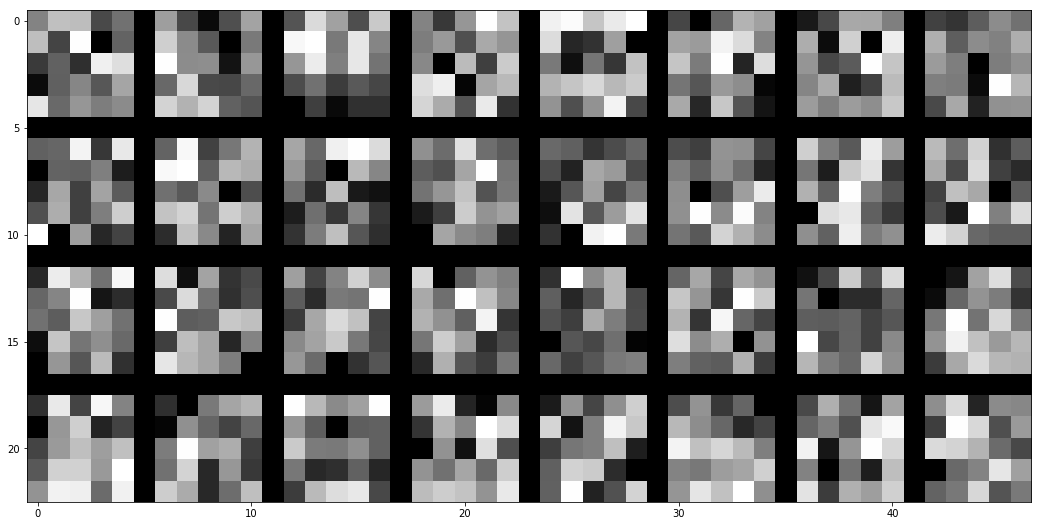

In [0]:
!wget --output-document utils1.py http://deeplearning.net/tutorial/code/utils.py
import utils1
from utils1 import tile_raster_images
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
image = Image.fromarray(tile_raster_images(kernels, img_shape=(5, 5) ,tile_shape=(4, 8), tile_spacing=(1, 1)))
### Plot image
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')  

Do you want to see the output of an image passing through first convolution layer?


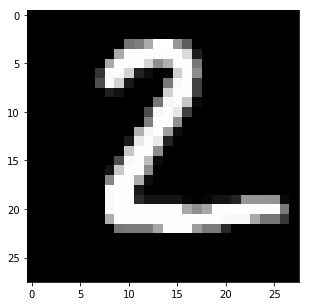

In [0]:
import numpy as np
plt.rcParams['figure.figsize'] = (5.0, 5.0)
sampleimage = mnist.test.images[1]
plt.imshow(np.reshape(sampleimage,[28,28]), cmap="gray")

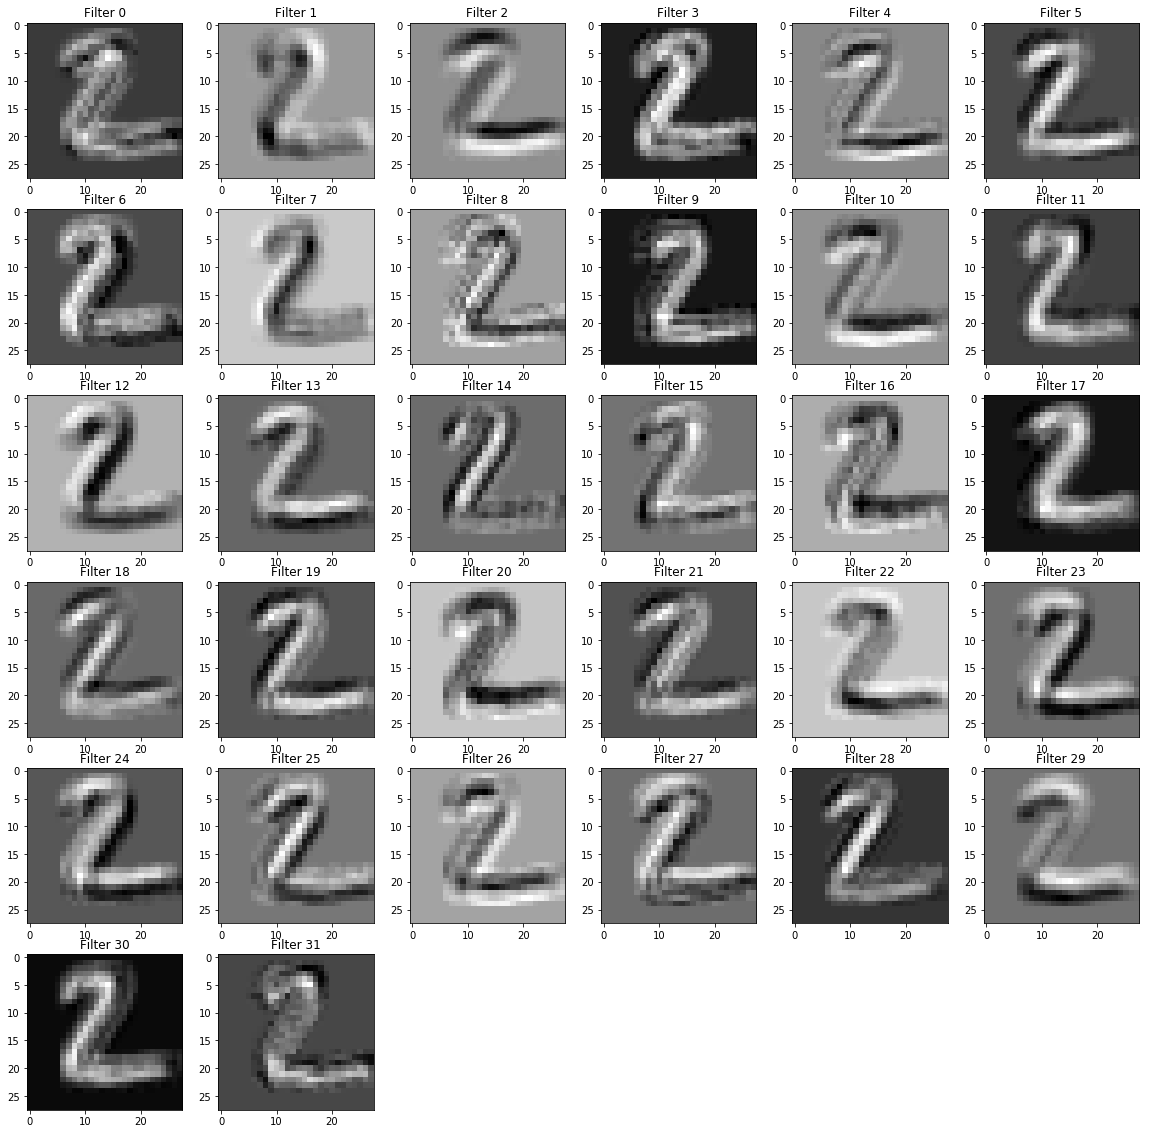

In [0]:
ActivatedUnits = sess.run(convolve1,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 6
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

What about second convolution layer?

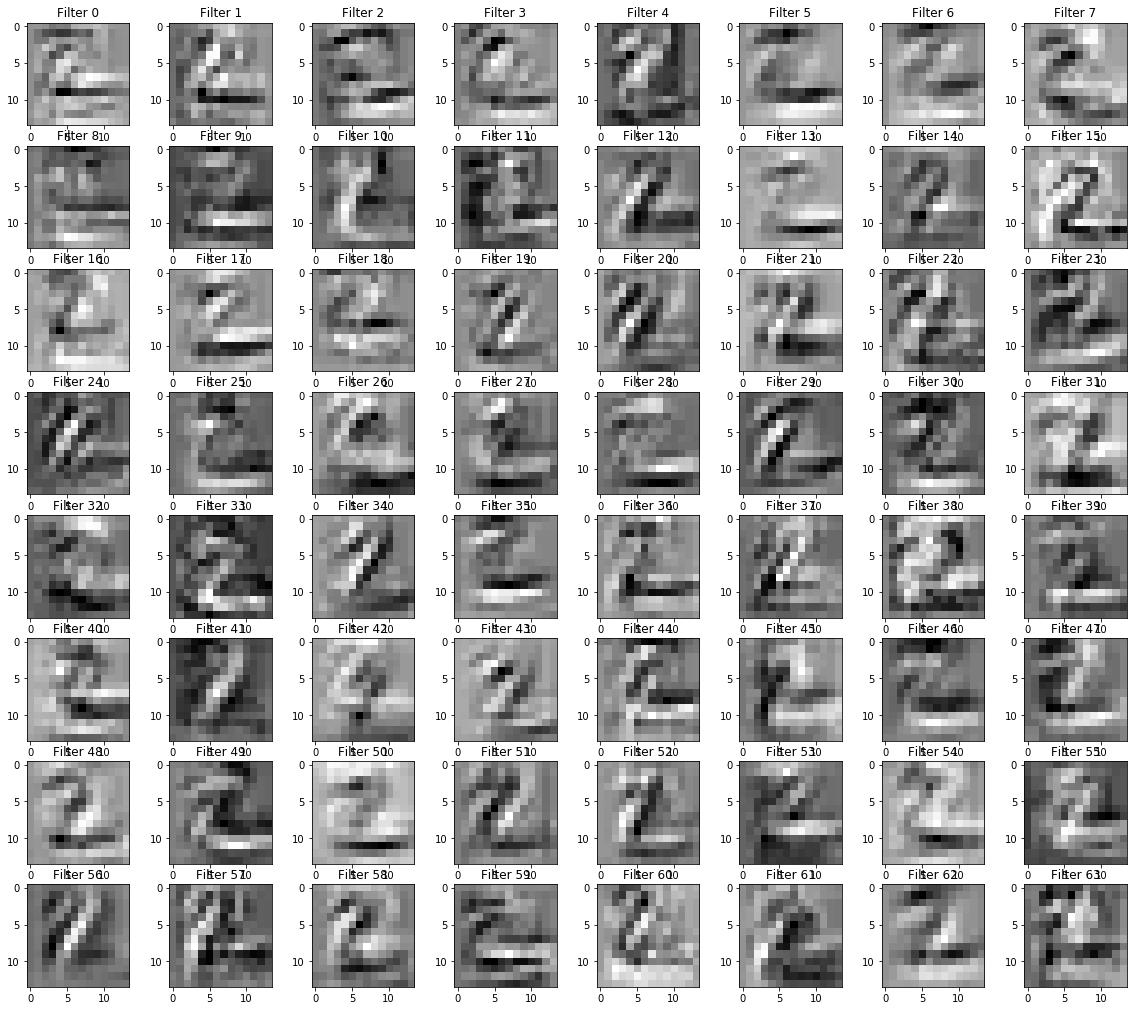

In [0]:
ActivatedUnits = sess.run(convolve2,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 8
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

In [0]:
sess.close() #finish the session

In [0]:
%%javascript
// Shutdown kernel
Jupyter.notebook.session.delete()

<IPython.core.display.Javascript object>

## Want to learn more?

Running deep learning programs usually needs a high performance platform. PowerAI speeds up deep learning and AI. Built on IBM's Power Systems, PowerAI is a scalable software platform that accelerates deep learning and AI with blazing performance for individual users or enterprises. The PowerAI platform supports popular machine learning libraries and dependencies including Tensorflow, Caffe, Torch, and Theano. You can download a [free version of PowerAI](https://cocl.us/ML0120EN_PAI).


### Thanks for completing this lesson!


<h3>Authors:</h3>
<article class="teacher">
<div class="teacher-image" style="    float: left;
    width: 115px;
    height: 115px;
    margin-right: 10px;
    margin-bottom: 10px;
    border: 1px solid #CCC;
    padding: 3px;
    border-radius: 3px;
    text-align: center;"><img class="alignnone wp-image-2258 " src="https://media.licdn.com/mpr/mpr/shrinknp_400_400/AAEAAQAAAAAAAAyFAAAAJGJlM2I2MmQzLTkxOWQtNDVhZi1hZGU0LWNlOWQzZDcyYjQ3ZA.jpg" alt="Saeed Aghabozorgi" width="178" height="178" /></div>
<h4>Saeed Aghabozorgi</h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>
</article>